In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.tools.print_version
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
print(statsmodels.tools.print_version.show_versions())


INSTALLED VERSIONS
------------------
Python: 3.7.11.final.0
OS: Darwin 20.6.0 Darwin Kernel Version 20.6.0: Wed Jun 23 00:26:27 PDT 2021; root:xnu-7195.141.2~5/RELEASE_ARM64_T8101 x86_64
byteorder: little
LC_ALL: None
LANG: ko_KR.UTF-8

statsmodels

Installed: 0.13.2 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/statsmodels)

Required Dependencies

cython: Not installed
numpy: 1.21.3 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy)
scipy: 1.7.3 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/scipy)
pandas: 1.3.4 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/pandas)
    dateutil: 2.8.2 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/dateutil)
patsy: 0.5.2 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/patsy)

Optional Dependencies

matplotlib: 3.4.3 (/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib)
    backend: module:/

## 인과 효과 추정


In [8]:
import datetime as dt

x = pd.date_range(dt.datetime(2017, 3, 1), dt.datetime(2017, 4, 1))
y = np.random.randn(len(x)) * 20 + 1000
y2 = np.random.randn(len(x)) * 20 + 1000

y_change = list(np.zeros(int(len(x)/2))) + list(np.ones(int(len(x)/2)) + 200)
y_change2 = list(np.zeros(int(len(x)/2))) + list(np.ones(int(len(x)/2)).cumsum() * 7)

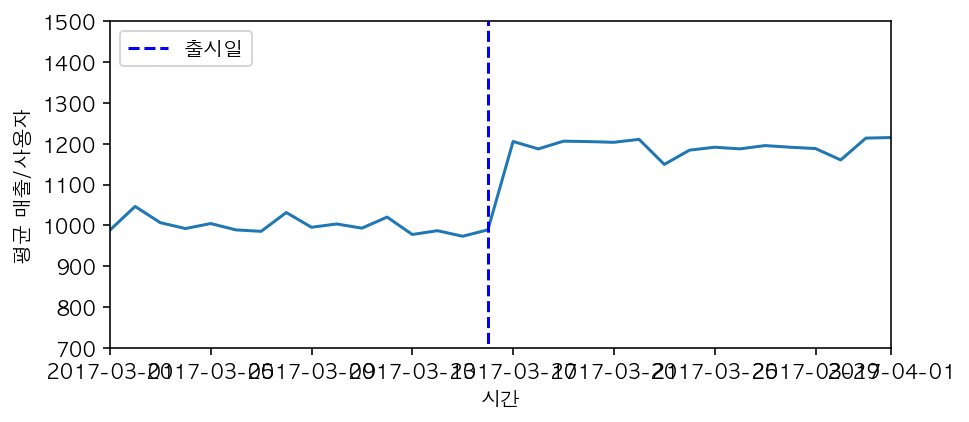

In [12]:
plt.figure(figsize=(7, 3))
plt.plot(x, y + y_change)
plt.ylim(700, 1500)
plt.xlabel('시간')
plt.xlim(x[0], x[-1])
plt.ylabel('평균 매출/사용자')
plt.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--', label='출시일')
plt.legend(loc='upper left')

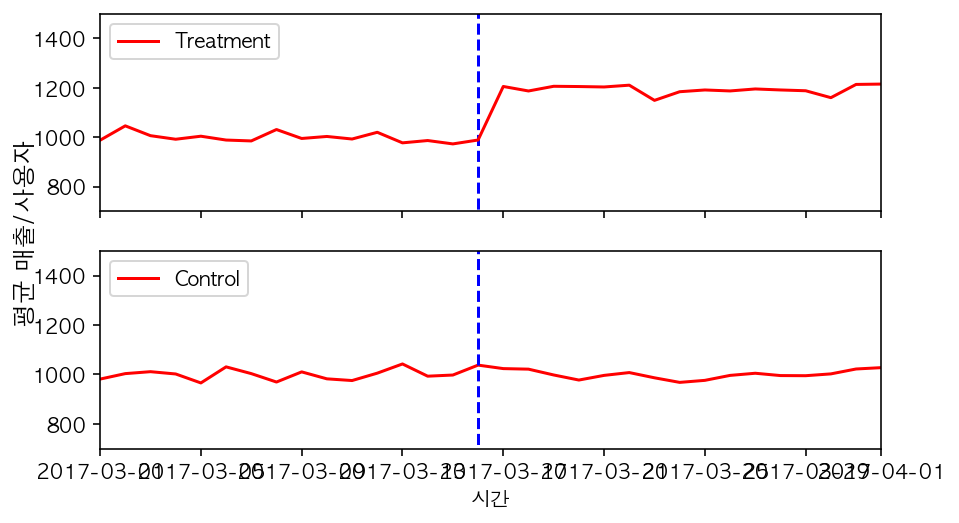

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 4))
ax1.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--')
ax1.plot(x, y + y_change, 'r-', label='Treatment')
ax1.set_ylim(700, 1500)
ax2.plot(x, y2, 'r-', label='Control')
ax1.legend(loc='upper left')
ax2.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--')
ax2.set_ylim(700, 1500)
plt.xlabel('시간')
ax1.set_xlim(x[0], x[-1])
ax2.set_xlim(x[0], x[-1])
fig.text(0.04, 0.5, '평균 매출/사용자', va='center', rotation='vertical', fontsize=12)
plt.legend(loc='upper left')

## 가설 검정 프레임

### 동전이 비뚤어지지는 않았은가?


In [14]:
x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)

Text(0, 0.5, '확률')

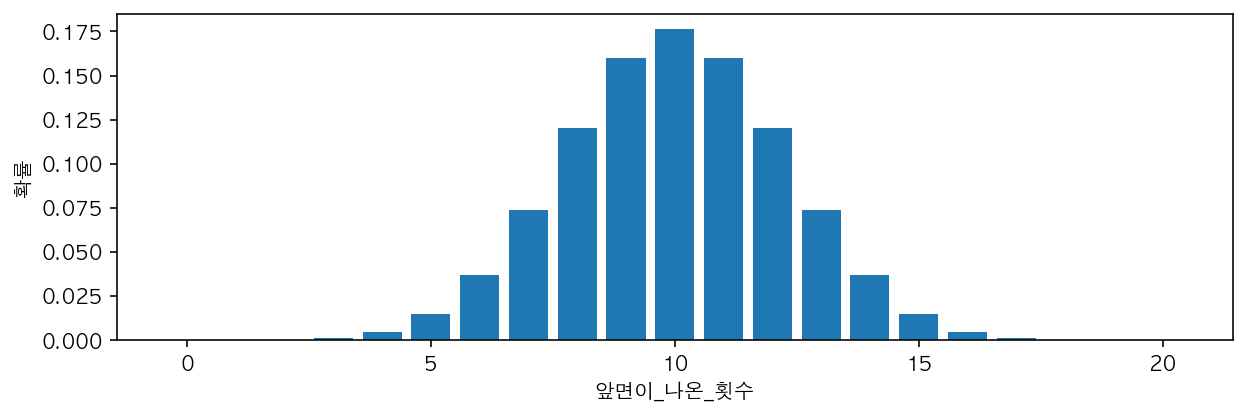

In [15]:
plt.figure(figsize=(10, 3))
plt.bar(x, y)
plt.xlabel('앞면이_나온_횟수')
plt.ylabel('확률')

In [16]:
import pandas as pd
p_value = pd.DataFrame({'앞면이_나온_횟수':x, '확률': y}).query(
    '앞면이_나온_횟수 >= 15'
    )['확률'].sum()
print(p_value)

0.02069473266601562


In [17]:
import pandas as pd
p_value = pd.DataFrame({'앞면이_나온_횟수':x, '확률': y}).query(
    '앞면이_나온_횟수 >= 15'
    )['확률'].sum()
print('{:,.4f}'.format(p_value))

0.0207


## 획득한 사용자의 지속 이용률 비교


In [18]:
# 테스트 데이터, 지속 이용 사용자 수, 이탈 사용자 수
a = {'n_success': 40, 'n_observation': 205, 'p': 40/205}
b = {'n_success': 62, 'n_observation': 290, 'p': 62/290}
   
print(f'Sample A: size={a["n_observation"]}, converted={a["n_success"]}, mean={a["p"]:.3f}')
print(f'Sample B: size={b["n_observation"]}, converted={b["n_success"]}, mean={b["p"]:.3f}')

Sample A: size=205, converted=40, mean=0.195
Sample B: size=290, converted=62, mean=0.214


In [19]:
x = np.linspace(0, 1, 200)

def calc_err(data):
    p = data['p']
    n = data['n_observation']
    return np.sqrt(p*(1-p)/n)

# 유입 경로가 A인 표본
y_a = scipy.stats.norm.pdf(x, a['p'], calc_err(a))

# 유입 경로가 B인 표본
y_b = scipy.stats.norm.pdf(x, b['p'], calc_err(b))

Text(0, 0.5, '가능도')

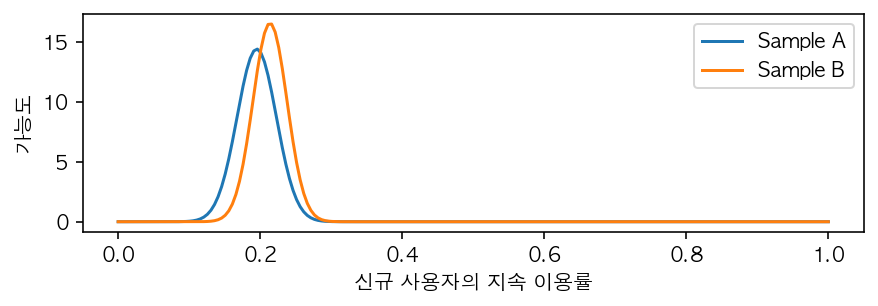

In [21]:
plt.figure(figsize=(7, 2))
plt.plot(x, y_a, label='Sample A')
plt.plot(x, y_b, label='Sample B')
plt.legend(loc='best')
plt.xlabel('신규 사용자의 지속 이용률')
plt.ylabel('가능도')

Text(0, 0.5, '가능도')

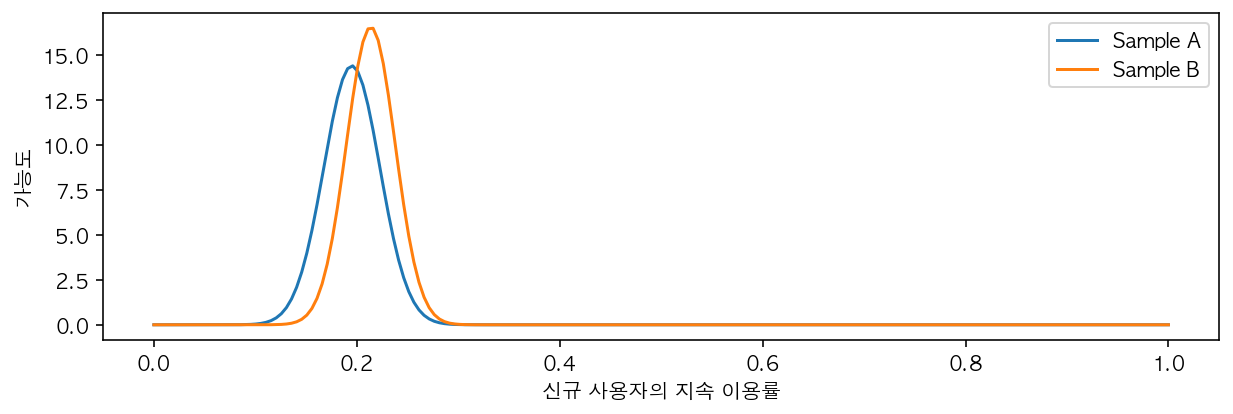

In [22]:
plt.figure(figsize=(10, 3))
plt.plot(x, y_a, label='Sample A')
plt.plot(x, y_b, label='Sample B')
plt.legend(loc='best')
plt.xlabel('신규 사용자의 지속 이용률')
plt.ylabel('가능도')

In [23]:
print(scipy.stats.chi2_contingency.__doc__)


Chi-square test of independence of variables in a contingency table.

    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::

        dof = observed.size - sum(observed.shape) + observed.ndim - 1


    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    correction : bool, optional
        If True, *and* the degrees of freedom is 1, apply Yates' correction
        for continuity.  The effect of the c

In [24]:
# 카이제곱 검정
_, p_value, _, _ = scipy.stats.chi2_contingency([
    [a['n_success'], a['n_observation'] - a['n_success']],
    [b['n_success'], b['n_observation'] - b['n_success']]
])
print(p_value)

0.694254736449269


## 차의 신뢰구간을 구한다


In [25]:
def calc_combined_err(a, b, alpha):
   p_a = a['p']
   n_a = a['n_observation']
   p_b = b['p']
   n_b = b['n_observation']
   z = scipy.stats.norm.ppf(1 - alpha/2)
   return z * np.sqrt(p_a*(1-p_a)/n_a + p_b*(1-p_b)/n_b)

def calc_diff_confidence_interval(a, b, alpha):
   err = calc_combined_err(a, b, alpha)
   diff = a['p'] - b['p']
   return (diff - err, diff + err)

calc_diff_confidence_interval(a, b, alpha=0.05)

(-0.09057004943075483, 0.05322774497322749)

## 거짓 양성과 거짓 음성


In [26]:
np.random.seed(34)

In [27]:
mu = 0.5  # 앞면이 나올 확률 50%
init_sample = list(scipy.stats.bernoulli.rvs(mu, size=20))

sample = init_sample
p_value_history = []
for i in range(200):
    # 직전 20회의 결과를 사용한 검정
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)
    p_value_history.append(p_value)
    # 새롭게 동전을 던진 결과를 저장
    sample.append(scipy.stats.bernoulli.rvs(mu))

Text(0, 0.5, 'p값')

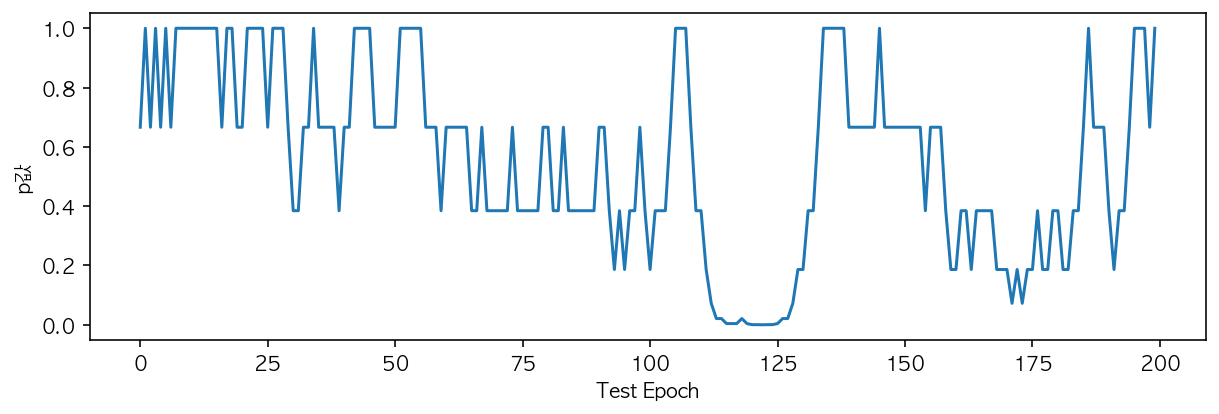

In [28]:
plt.figure(figsize=(10, 3))
plt.plot(p_value_history)
plt.xlabel('Test Epoch')
plt.ylabel('p값')


In [29]:
np.random.seed(31)
max_sample = 3000000
# 표본 A 평균: 45.1%
a = scipy.stats.bernoulli.rvs(0.451, size=max_sample)
# 표본 B 평균: 45.2%
b = scipy.stats.bernoulli.rvs(0.452, size=max_sample)
p_values = []
# 5,000씩 샘플 크기를 증가하면서 검증
sample_sizes = np.arange(1000, max_sample, 5000)
for sample_size in sample_sizes:
    _, p_value = scipy.stats.ttest_ind(a[:sample_size], b[:sample_size], equal_var=False)
    p_values.append(p_value)

Text(0, 0.5, 'p값')

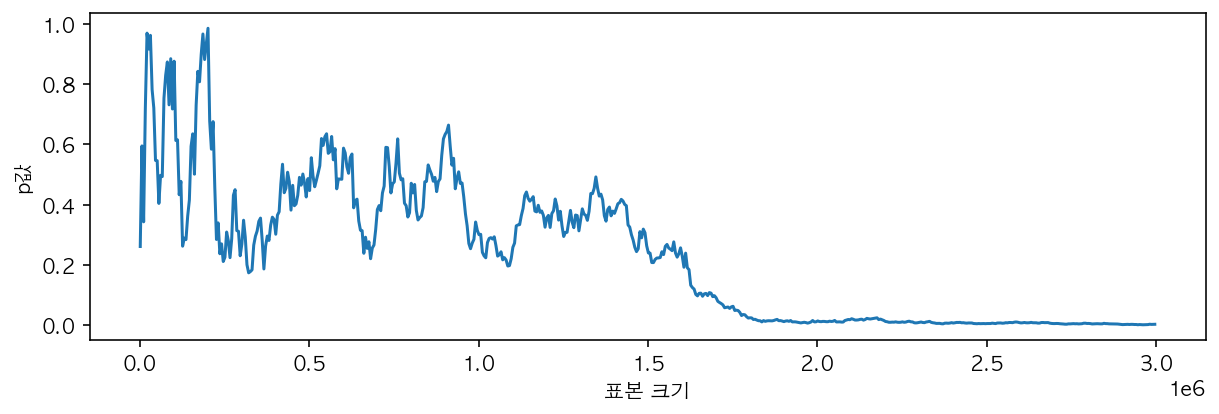

In [30]:
plt.figure(figsize=(10, 3))
plt.plot(sample_sizes, p_values)
plt.xlabel('표본 크기')
plt.ylabel('p값')

## A/B 테스트 설계 및 실시


E(Y0) = 0.05171428571428571
E(Y1) = 0.06571428571428571


(0.03, 0.08)

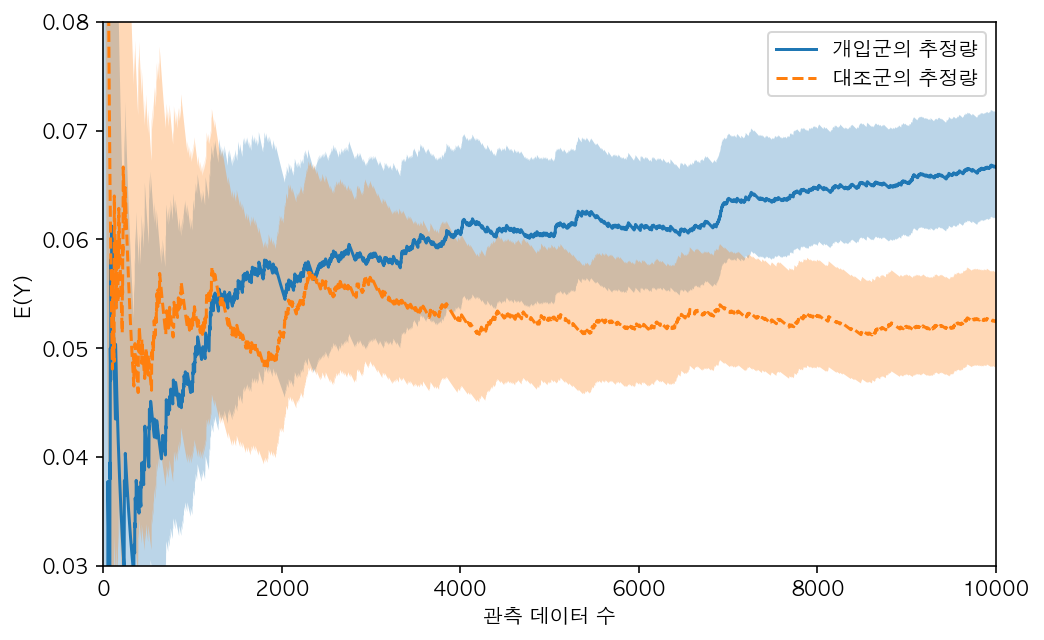

In [31]:
np.random.seed(4)
T = 14000

control = scipy.stats.binom(1, 0.05).rvs(size=T)
print('E(Y0) =', np.mean(control))
treatment = scipy.stats.binom(1, 0.065).rvs(size=T)
print('E(Y1) =', np.mean(treatment))

n_observed = np.ones(T).cumsum().astype(int)
treatment_p = treatment.cumsum()/n_observed
control_p = control.cumsum()/n_observed

import statsmodels.stats.proportion

@np.vectorize
def calc_confidence_interval(n_success, n_observed):
   return statsmodels.stats.proportion.proportion_confint(
      n_success, n_observed, alpha=0.05, method='wilson'
   )

treatment_lcb, treatment_ucb = calc_confidence_interval(treatment.cumsum(), n_observed)
control_lcb, control_ucb = calc_confidence_interval(control.cumsum(), n_observed)

fig = plt.figure(figsize=(8, 5))
plt.plot(n_observed, treatment_p, label='개입군의 추정량')
plt.fill_between(n_observed, treatment_lcb, treatment_ucb, alpha=0.3, interpolate=True)
plt.plot(n_observed, control_p, linestyle='dashed',  label='대조군의 추정량')
plt.fill_between(n_observed, control_lcb, control_ucb, alpha=0.3, interpolate=True)
plt.legend(loc='best')
plt.xlim(0, 10000)
plt.xlabel('관측 데이터 수')
plt.ylabel('E(Y)')
plt.ylim(0.030, 0.08)

In [32]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

def _calc_diff_confidence_interval(n_success_a, n_success_b, n_observed):
   if n_observed < 10:
      return (1, -1)
   sample_a = DescrStatsW(np.append(np.ones(n_success_a), np.zeros(n_observed - n_success_a)))
   sample_b = DescrStatsW(np.append(np.ones(n_success_b), np.zeros(n_observed - n_success_b)))
   lcb, ucb = CompareMeans(sample_a, sample_b).zconfint_diff(alpha=0.05)
   return float(lcb), float(ucb)
calc_diff_confidence_interval = np.vectorize(_calc_diff_confidence_interval, otypes=[np.float, np.float])

diff_interval_lcb, diff_interval_ucb = calc_diff_confidence_interval(
   treatment.cumsum(),
   control.cumsum(),
   n_observed
)

diff = treatment_p - control_p

xmax = 10000
fig = plt.figure(figsize=(8, 5))
plt.plot(n_observed, diff, color='green', label='개입 효과의 추정량')
plt.fill_between(n_observed, diff_interval_lcb, diff_interval_ucb, alpha=0.6, color='lightgreen', interpolate=True)
plt.hlines([0], 0, xmax, "black")
plt.hlines([0.015], 0, xmax, "green", linestyles='dashed', label='실제 개입 효과')
plt.ylim(-0.02, 0.03)
plt.ylabel('2개 그룹의 E(Y)의 차')
plt.xlabel('관측 데이터 수')
plt.legend(loc='best')
plt.xlim(0, xmax)

/Users/jinyoung/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
